## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [2380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2381]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [2382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [2383]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [2384]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1960.0        1
4130.0        1
915.0         1
1024.0        1
2390.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [2385]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [2386]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [2387]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [2388]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [2389]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [2390]:
# Update null values to 0
df.fillna(0, inplace = True)

In [2391]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [2392]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)

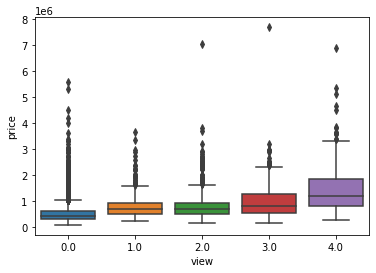

In [2393]:
sns.boxplot(x='view', y='price', data=df)

In [2394]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [2395]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [2396]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [2397]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [2398]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [2399]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [2400]:
# view
#df['view'].value_counts()

In [2401]:
# Update view
#df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [2402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [2403]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [2404]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [2405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [2406]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [2407]:
# cols to round
#cols = ['bedrooms', 'bathrooms']

#df[cols] = df[cols].round(0)
#df[cols]

In [2408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  float64
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 3.5 MB


In [2409]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)
df['view'] = df.waterfront.astype(int)

## Check for outliers

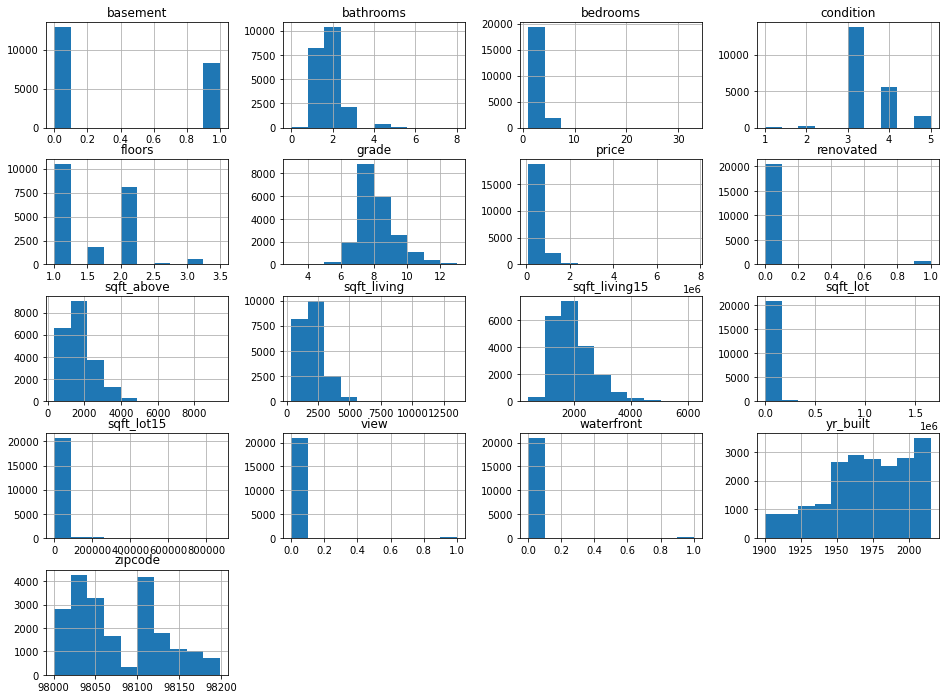

In [2410]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [2411]:
# bathrooms
#df['bathrooms'].hist();

In [2412]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [2413]:
#df['bathrooms'].value_counts()

In [2414]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [2415]:
# bathrooms
#df['bathrooms'].hist();

In [2416]:
# bedrooms
#df['bedrooms'].hist();

In [2417]:
#df['bedrooms'].value_counts()

In [2418]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [2419]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [2420]:
#df['bedrooms'].hist()

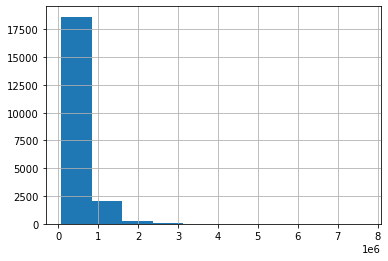

In [2421]:
#price
df.price.hist();

In [2422]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [2423]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [2424]:
# Set limit to 1100000
#df = df[df['price']<=1200000]

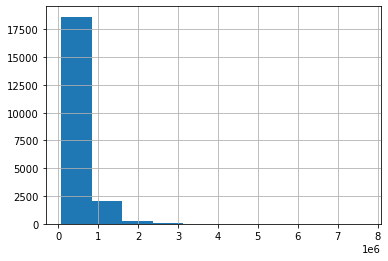

In [2425]:
df.price.hist();

In [2426]:
# features
sqft_feats = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'floors']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

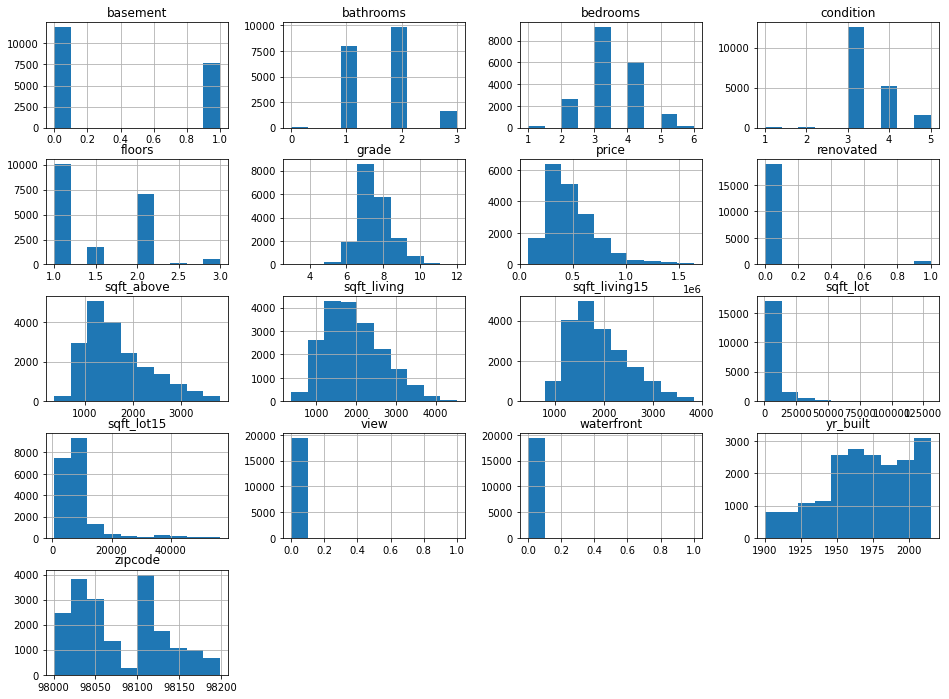

In [2427]:
df.hist(figsize=(16,12));

In [2428]:
df.floors.value_counts()

1.0    10042
2.0     7029
1.5     1748
3.0      559
2.5      113
Name: floors, dtype: int64

In [2429]:
df.bedrooms.value_counts()

3    9215
4    6035
2    2614
5    1255
6     189
1     183
Name: bedrooms, dtype: int64

In [2430]:
df.bathrooms.value_counts()

2    9791
1    7997
3    1633
0      70
Name: bathrooms, dtype: int64

## Normalize Continuous Features

In [2431]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = bathrooms (decided to not include bathrooms, bedrooms, floors)
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'price']
for var in log_feats:
    df[var]= np.log(df[var])

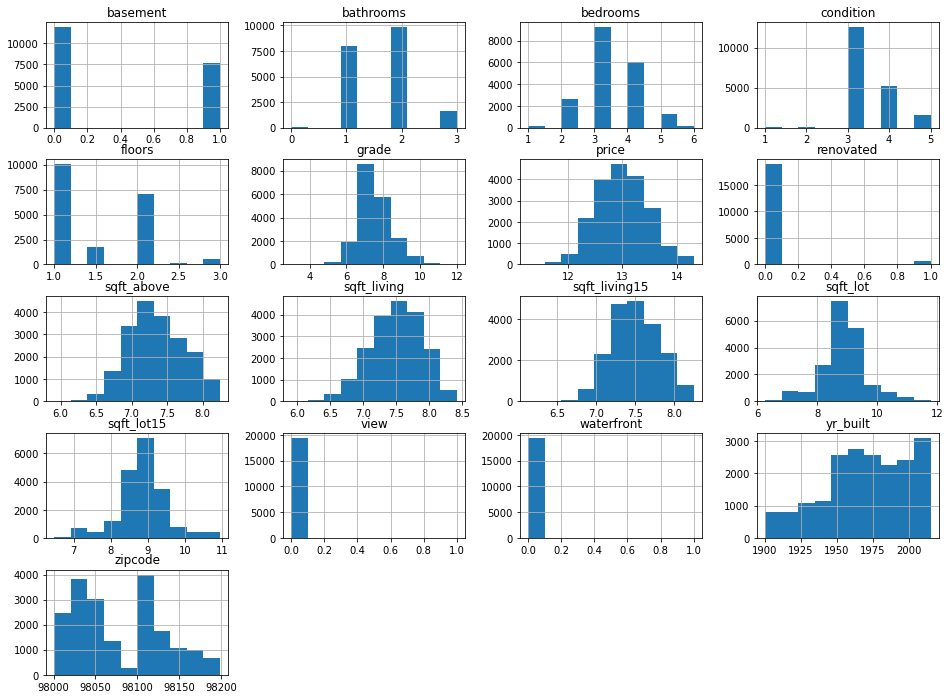

In [2432]:
df.hist(figsize = (16,12));

In [2433]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data more normal, it will just change the mean and the standard error!

continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

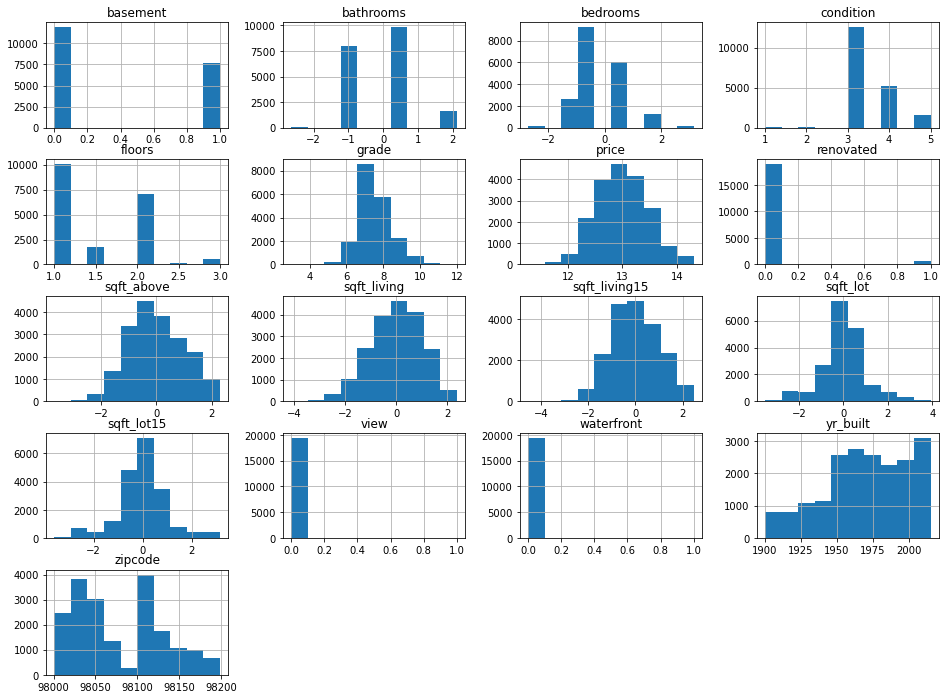

In [2434]:
df.hist(figsize = (16, 12));

In [2435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19491 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19491 non-null  float64
 1   bedrooms       19491 non-null  float64
 2   bathrooms      19491 non-null  float64
 3   sqft_living    19491 non-null  float64
 4   sqft_lot       19491 non-null  float64
 5   floors         19491 non-null  float64
 6   waterfront     19491 non-null  int64  
 7   view           19491 non-null  int64  
 8   condition      19491 non-null  int64  
 9   grade          19491 non-null  int64  
 10  sqft_above     19491 non-null  float64
 11  yr_built       19491 non-null  int64  
 12  zipcode        19491 non-null  int64  
 13  sqft_living15  19491 non-null  float64
 14  sqft_lot15     19491 non-null  float64
 15  renovated      19491 non-null  int64  
 16  basement       19491 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.7 MB


# Explore Data

## What are my top zip codes

In [2436]:
df.zipcode.value_counts()

98103    574
98115    559
98117    538
98052    538
98034    514
        ... 
98010     76
98070     66
98148     54
98024     40
98039     17
Name: zipcode, Length: 70, dtype: int64

In [2437]:
# Create copy
dfziptiers = df.copy()

In [2438]:
# Groupby zipcode and take median price
dfzipmed = dfziptiers.groupby(dfziptiers['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfzipmed = dfzipmed.reset_index()

# Set as string to match
dfzipmed['zipcode'] = dfzipmed['zipcode'].astype('object')

dfzipmed.head(10)

,zipcode,price
0,98039,14.046622
1,98004,13.737549
2,98040,13.737549
3,98112,13.602936
4,98005,13.512986
5,98109,13.477369
6,98119,13.477228
7,98075,13.465953
8,98006,13.458764
9,98102,13.422468


In [2439]:
# Count number of houses in each zipcode

# Get list of unique zipcodes
zipcodelist = list(dfzipmed['zipcode'].unique())

# Create empty dictionary
zipcodecount = {}

# iterate through unique zipcodes and add count to dictionary
for zipcode in zipcodelist:
    count = len(dfziptiers[dfziptiers['zipcode'] == zipcode])
    zipcodecount[zipcode] = count
    
# create DataFrame based on count
dfzipcount = pd.DataFrame.from_dict(zipcodecount, orient='index')
dfzipcount = dfzipcount.reset_index()
dfzipcount = dfzipcount.rename(columns = {'index': 'zipcode', 0 :'count'})
dfzipcount.head()

,zipcode,count
0,98039,17
1,98004,217
2,98040,213
3,98112,212
4,98005,147


In [2440]:
# Merge the two tables
df_zip_price_count = dfzipmed.merge(dfzipcount, how = 'inner')
df_zip_price_count

,zipcode,price,count
0,98039,14.046622,17
1,98004,13.737549,217
2,98040,13.737549,213
3,98112,13.602936,212
4,98005,13.512986,147
...,...,...,...
65,98188,12.476100,127
66,98001,12.468437,345
67,98032,12.425208,122
68,98168,12.367341,260


In [2441]:
# https://stackoverflow.com/questions/60255203/how-to-label-every-nth-row-of-a-pandas-dataframe-by-an-incremental-value
df_zip_price_count['rank'] = np.divmod(np.arange(len(df_zip_price_count)),7)[0]+1

In [2442]:
df_zip_price_count.head(15)

,zipcode,price,count,rank
0,98039,14.046622,17,1
1,98004,13.737549,217,1
2,98040,13.737549,213,1
3,98112,13.602936,212,1
4,98005,13.512986,147,1
5,98109,13.477369,98,1
6,98119,13.477228,162,1
7,98075,13.465953,281,2
8,98006,13.458764,400,2
9,98102,13.422468,93,2


In [2443]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
0,12.309982,-0.368931,-1.057352,-1.108873,-0.315248,1.0,0,0,3,7,-0.701722,1955,98178,-1.010117,-0.327574,0,0
1,13.195614,-0.368931,0.529531,0.903723,0.019740,2.0,0,0,3,7,0.863667,1951,98125,-0.242900,0.129199,1,1
2,12.100712,-1.541606,-1.057352,-2.212605,0.455189,1.0,0,0,3,6,-1.798599,1933,98028,1.330500,0.210819,0,0
3,13.311329,0.803743,2.116414,0.203130,-0.480173,1.0,0,0,5,7,-1.001648,1965,98136,-0.961136,-0.512665,0,1
4,13.142166,-0.368931,0.529531,-0.195440,0.167497,1.0,0,0,3,8,0.206039,1987,98074,-0.034421,0.101994,0,0


In [2444]:
df_zip_price_count.drop(['price', 'count'], axis = 1, inplace = True)

In [2445]:
df = pd.merge(df, df_zip_price_count, on='zipcode')

In [2446]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement,rank
0,12.309982,-0.368931,-1.057352,-1.108873,-0.315248,1.0,0,0,3,7,-0.701722,1955,98178,-1.010117,-0.327574,0,0,9
1,12.232836,-1.541606,-1.057352,-1.867348,-0.069215,1.0,0,0,4,6,-1.455487,1945,98178,-1.402609,-0.051458,0,0,9
2,13.005830,-0.368931,0.529531,0.381517,0.187555,1.0,0,0,3,8,0.112592,1967,98178,1.256754,0.328249,0,1,9
3,12.371587,-0.368931,-1.057352,-0.858460,-0.257279,1.0,0,0,3,7,-0.452863,1961,98178,-1.059834,0.125228,0,0,9
4,12.043554,-1.541606,-1.057352,-1.926790,-0.410484,1.0,0,0,3,6,-1.514559,1931,98178,-0.322092,0.339161,0,0,9


In [2447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19491 entries, 0 to 19490
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19491 non-null  float64
 1   bedrooms       19491 non-null  float64
 2   bathrooms      19491 non-null  float64
 3   sqft_living    19491 non-null  float64
 4   sqft_lot       19491 non-null  float64
 5   floors         19491 non-null  float64
 6   waterfront     19491 non-null  int64  
 7   view           19491 non-null  int64  
 8   condition      19491 non-null  int64  
 9   grade          19491 non-null  int64  
 10  sqft_above     19491 non-null  float64
 11  yr_built       19491 non-null  int64  
 12  zipcode        19491 non-null  object 
 13  sqft_living15  19491 non-null  float64
 14  sqft_lot15     19491 non-null  float64
 15  renovated      19491 non-null  int64  
 16  basement       19491 non-null  int64  
 17  rank           19491 non-null  int64  
dtypes: flo

In [2448]:
df.sort_values('price')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement,rank
14748,11.264464,-1.541606,-1.057352,-2.179242,1.118137,1.0,0,0,1,5,-1.765444,1942,98168,-0.223394,0.594569,0,0,10
19065,11.289782,-2.714281,-2.644235,-3.718980,-0.466746,1.0,0,0,2,4,-3.295619,1912,98014,-1.374942,0.101388,0,0,7
14758,11.302204,-1.541606,-1.057352,-2.350535,0.451811,1.0,0,0,1,5,-1.935673,1943,98168,-2.476362,0.377503,0,0,10
1925,11.314475,-0.368931,-1.057352,-1.926790,0.511484,1.0,0,0,3,6,-1.514559,1954,98146,-1.544525,0.715441,0,0,8
14581,11.320554,-1.541606,-1.057352,-3.227606,1.539500,1.0,0,0,2,5,-2.807297,1951,98168,-0.482197,0.621018,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,14.304091,0.803743,2.116414,2.299858,0.172831,3.0,0,0,3,11,2.142876,2003,98116,1.390722,-0.301004,0,1,3
6422,14.304091,0.803743,2.116414,1.286435,-0.923471,2.0,0,0,3,9,0.839875,1999,98112,1.632321,-0.574488,0,1,1
16065,14.310207,-0.368931,2.116414,1.421660,-0.365120,2.0,0,0,4,10,0.945246,1913,98109,1.598869,-0.438775,0,1,1
11817,14.310207,1.976418,2.116414,2.185990,1.784686,1.0,0,0,3,10,0.791619,1958,98004,2.116507,2.387949,1,1,1


## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

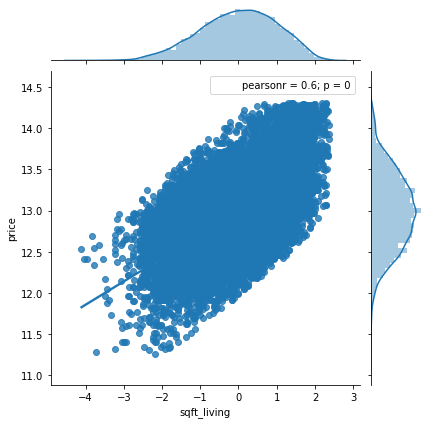

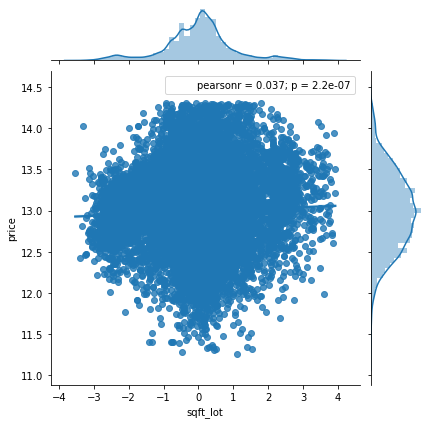

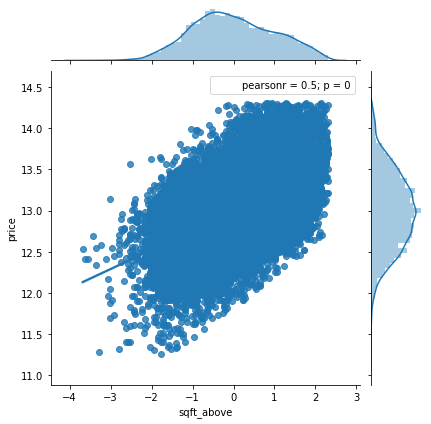

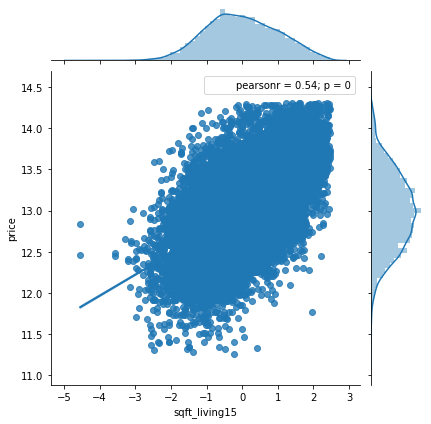

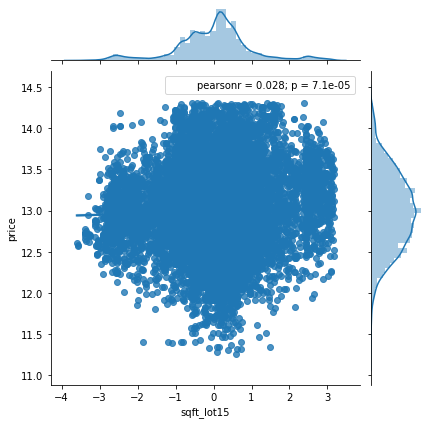

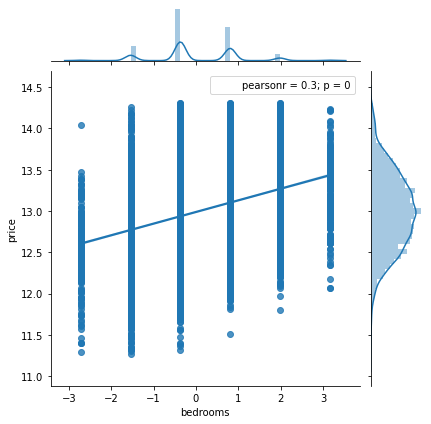

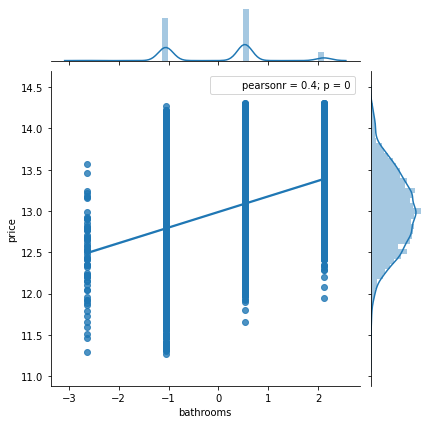

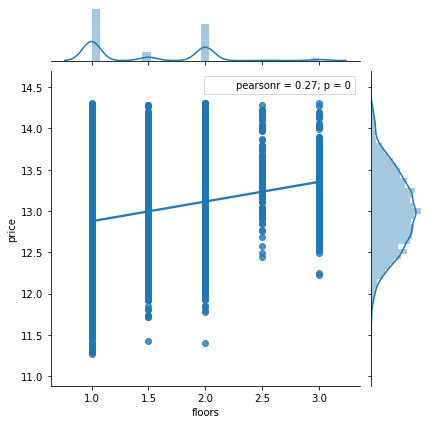

In [2449]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# Box Plots

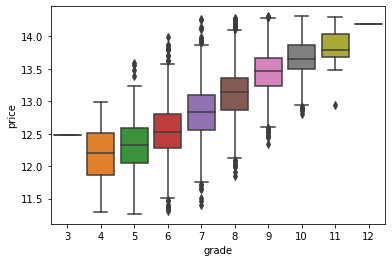

In [2450]:
sns.boxplot(x = df['grade'], y = df['price'])

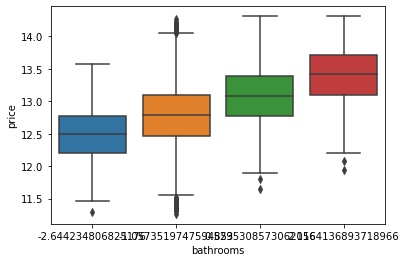

In [2451]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

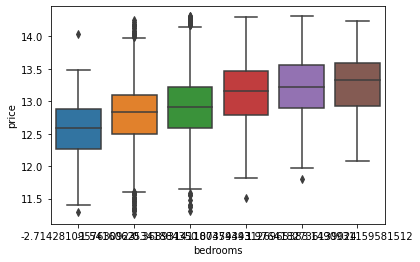

In [2452]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

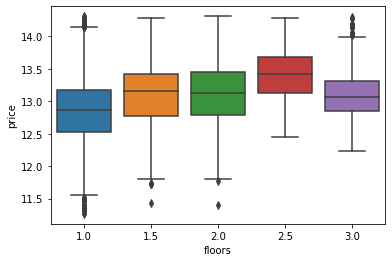

In [2453]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

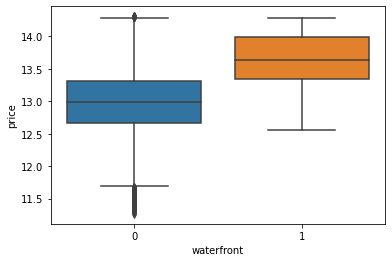

In [2454]:
sns.boxplot(x = df['waterfront'], y = df['price'])

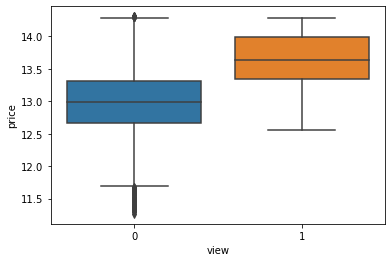

In [2455]:
sns.boxplot(x = df['view'], y = df['price'])

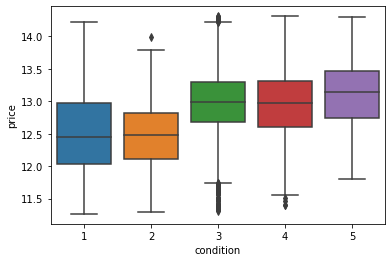

In [2456]:
sns.boxplot(x = df['condition'], y = df['price'])

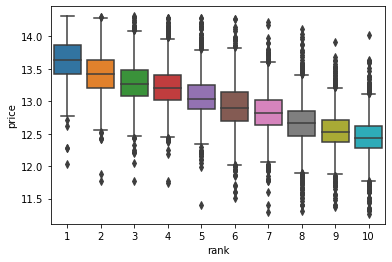

In [2457]:
sns.boxplot(x = df['rank'], y = df['price'])

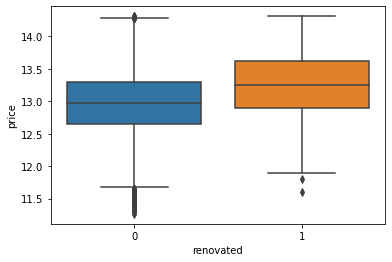

In [2458]:
sns.boxplot(x = df['renovated'], y = df['price'])

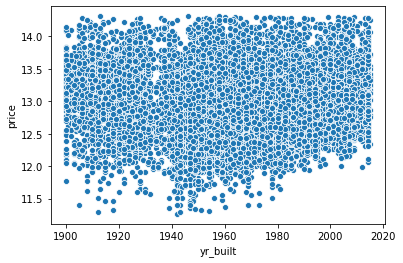

In [2459]:
sns.scatterplot(x = df['yr_built'], y = df['price'])

## Check for multicollinearity

In [2460]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.300859,0.402303,0.602937,0.037119,0.273083,0.077178,0.077178,0.059222,0.629827,0.496258,0.035829,0.544718,0.028449,0.094850,0.217917,-0.731431
bedrooms,0.300859,1.000000,0.422994,0.634119,0.218570,0.151744,-0.029489,-0.029489,0.035602,0.333871,0.512411,0.160863,0.403988,0.198740,0.003310,0.157550,-0.040697
bathrooms,0.402303,0.422994,1.000000,0.613504,-0.036315,0.479445,-0.005705,-0.005705,-0.127840,0.532970,0.566296,0.461491,0.440470,-0.037506,0.041729,0.117103,-0.136533
sqft_living,0.602937,0.634119,0.613504,1.000000,0.273600,0.334156,0.011965,0.011965,-0.034568,0.689096,0.835960,0.337629,0.717102,0.253675,0.035702,0.246636,-0.185073
sqft_lot,0.037119,0.218570,-0.036315,0.273600,1.000000,-0.348024,0.058367,0.058367,0.118688,0.083385,0.250708,-0.078599,0.335759,0.910124,0.015941,-0.043197,0.140696
floors,0.273083,0.151744,0.479445,0.334156,-0.348024,1.000000,-0.000347,-0.000347,-0.267676,0.451963,0.537951,0.497205,0.244443,-0.334116,-0.002296,-0.274238,-0.146204
waterfront,0.077178,-0.029489,-0.005705,0.011965,0.058367,-0.000347,1.000000,1.000000,0.005139,0.007197,-0.000004,-0.033050,0.031744,0.068789,0.066663,0.017395,0.021910
view,0.077178,-0.029489,-0.005705,0.011965,0.058367,-0.000347,1.000000,1.000000,0.005139,0.007197,-0.000004,-0.033050,0.031744,0.068789,0.066663,0.017395,0.021910
condition,0.059222,0.035602,-0.127840,-0.034568,0.118688,-0.267676,0.005139,0.005139,1.000000,-0.149540,-0.144632,-0.354242,-0.083520,0.124046,-0.056417,0.131261,-0.036547
grade,0.629827,0.333871,0.532970,0.689096,0.083385,0.451963,0.007197,0.007197,-0.149540,1.000000,0.691562,0.459662,0.640084,0.096639,0.005185,0.040258,-0.320603


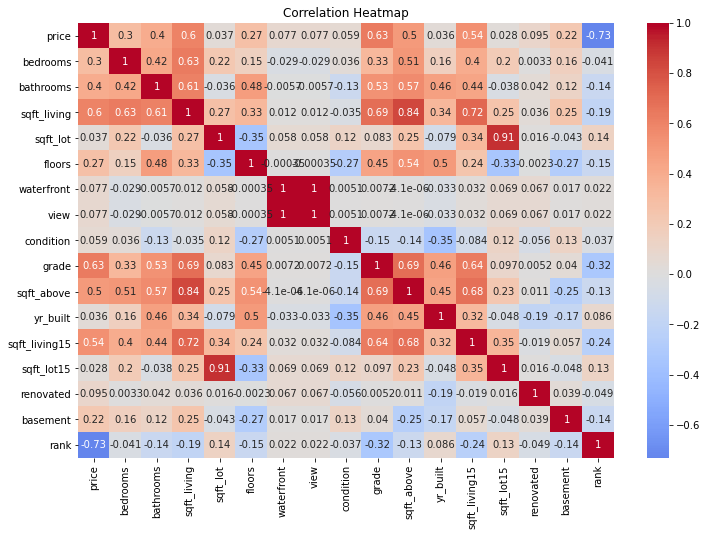

In [2461]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2462]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.300859,0.402303,0.602937,0.037119,0.273083,0.077178,0.077178,0.059222,0.629827,0.496258,0.035829,0.544718,0.028449,0.094850,0.217917,-0.731431
bedrooms,0.300859,1.000000,0.422994,0.634119,0.218570,0.151744,-0.029489,-0.029489,0.035602,0.333871,0.512411,0.160863,0.403988,0.198740,0.003310,0.157550,-0.040697
bathrooms,0.402303,0.422994,1.000000,0.613504,-0.036315,0.479445,-0.005705,-0.005705,-0.127840,0.532970,0.566296,0.461491,0.440470,-0.037506,0.041729,0.117103,-0.136533
sqft_living,0.602937,0.634119,0.613504,1.000000,0.273600,0.334156,0.011965,0.011965,-0.034568,0.689096,0.835960,0.337629,0.717102,0.253675,0.035702,0.246636,-0.185073
sqft_lot,0.037119,0.218570,-0.036315,0.273600,1.000000,-0.348024,0.058367,0.058367,0.118688,0.083385,0.250708,-0.078599,0.335759,0.910124,0.015941,-0.043197,0.140696
floors,0.273083,0.151744,0.479445,0.334156,-0.348024,1.000000,-0.000347,-0.000347,-0.267676,0.451963,0.537951,0.497205,0.244443,-0.334116,-0.002296,-0.274238,-0.146204
waterfront,0.077178,-0.029489,-0.005705,0.011965,0.058367,-0.000347,1.000000,1.000000,0.005139,0.007197,-0.000004,-0.033050,0.031744,0.068789,0.066663,0.017395,0.021910
view,0.077178,-0.029489,-0.005705,0.011965,0.058367,-0.000347,1.000000,1.000000,0.005139,0.007197,-0.000004,-0.033050,0.031744,0.068789,0.066663,0.017395,0.021910
condition,0.059222,0.035602,-0.127840,-0.034568,0.118688,-0.267676,0.005139,0.005139,1.000000,-0.149540,-0.144632,-0.354242,-0.083520,0.124046,-0.056417,0.131261,-0.036547
grade,0.629827,0.333871,0.532970,0.689096,0.083385,0.451963,0.007197,0.007197,-0.149540,1.000000,0.691562,0.459662,0.640084,0.096639,0.005185,0.040258,-0.320603


In [2463]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [2464]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [2465]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.910124
"(sqft_living, sqft_above)",0.835960


In [2466]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode'], inplace=True) 

In [2467]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'renovated',
       'basement', 'rank'],
      dtype='object')

In [2468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19491 entries, 0 to 19490
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19491 non-null  float64
 1   bedrooms     19491 non-null  float64
 2   bathrooms    19491 non-null  float64
 3   sqft_living  19491 non-null  float64
 4   sqft_lot     19491 non-null  float64
 5   floors       19491 non-null  float64
 6   waterfront   19491 non-null  int64  
 7   view         19491 non-null  int64  
 8   condition    19491 non-null  int64  
 9   grade        19491 non-null  int64  
 10  yr_built     19491 non-null  int64  
 11  renovated    19491 non-null  int64  
 12  basement     19491 non-null  int64  
 13  rank         19491 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.9 MB


## Save Results

In [2469]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [2470]:
categorical_feats = ['view', 'basement', 'condition', 'grade', 'renovated', 'waterfront', 'yr_built', 'rank']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [2471]:
df = pd.get_dummies(df, drop_first = True)

In [2472]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
0,12.309982,-0.368931,-1.057352,-1.108873,-0.315248,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,12.232836,-1.541606,-1.057352,-1.867348,-0.069215,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.005830,-0.368931,0.529531,0.381517,0.187555,1.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,12.371587,-0.368931,-1.057352,-0.858460,-0.257279,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,12.043554,-1.541606,-1.057352,-1.926790,-0.410484,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [2473]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [2474]:
df.columns = [col_formatting(col) for col in df.columns]

In [2475]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 

In [2476]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [2477]:
train, test = train_test_split(df)

In [2478]:
print(len(train), len(test))
train.head()

14618 4873


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
4098,13.017003,-1.541606,-1.057352,-0.959868,-1.219913,1.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5957,12.506177,1.976418,0.529531,0.963393,0.231108,1.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12355,13.361380,-0.368931,0.529531,1.589044,-0.778933,2.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
12686,14.038654,-0.368931,2.116414,1.887572,0.235879,2.5,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
12265,13.208541,-0.368931,0.529531,0.176611,0.424480,1.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [2479]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
16726,13.764217,0.803743,0.529531,1.596751,0.649410,2.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5071,12.873902,0.803743,-1.057352,0.478185,0.077731,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7448,13.361380,-0.368931,0.529531,-0.437259,-1.179436,1.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
19416,12.235631,-0.368931,-1.057352,-1.410673,-0.418711,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7282,13.041153,-0.368931,0.529531,-0.289471,-2.654719,2.5,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [2480]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     493.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:33   Log-Likelihood:                 3307.9
No. Observations:               14618   AIC:                            -6326.
Df Residuals:                   14473   BIC:                            -5225.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.6128      0.051    268.306      0.000      13.513      13.712
bedrooms         -0.0061      0.002     -2.760      0.006      -0.010      -0.002
bathrooms         0.0197      0.002      8.319      0.000       0.015       0.024
sqft_living       0.1617      0.003     48.614      0.000       0.155       0.168
sqft_lot          0.0217      0.002      8.992      0.000       0.017       0.026
floors           -0.0029      0.005     -0.581      0.561      -0.013       0.007
waterfront_1      0.3212      0.015     21.627      0.000       0.292       0.350
view_1            0.3212      0.015     21.627      0.000       0.292       0.350
condition_2       0.1629      0.047      3.485      0.000       0.071       0.254
condition_3       0.2967      0.043      6.890      0.000       0.212       0.381
condition_4       0.3313      0.043      7.690      0.000       0.247       0.416
condition_5       0.3789      0.043      8.742      0.000       0.294       0.464
grade_11          0.0726      0.027      2.728      0.006       0.020       0.125
grade_12      -1.266e-14    6.6e-16    -19.173      0.000    -1.4e-14   -1.14e-14
grade_3          -0.0767      0.196     -0.391      0.696      -0.461       0.308
grade_4          -0.5660      0.045    -12.537      0.000      -0.655      -0.478
grade_5          -0.6015      0.020    -30.438      0.000      -0.640      -0.563
grade_6          -0.4880      0.013    -38.000      0.000      -0.513      -0.463
grade_7          -0.3560      0.011    -33.834      0.000      -0.377      -0.335
grade_8          -0.2391      0.010    -24.647      0.000      -0.258      -0.220
grade_9          -0.1018      0.010    -10.250      0.000      -0.121      -0.082
yr_built_1901    -0.0651      0.050     -1.289      0.197      -0.164       0.034
yr_built_1902    -0.0608      0.053     -1.153      0.249      -0.164       0.043
yr_built_1903    -0.0941      0.044     -2.125      0.034      -0.181      -0.007
yr_built_1904    -0.0065      0.040     -0.164      0.870      -0.085       0.072
yr_built_1905    -0.0354      0.035     -1.006      0.315      -0.104       0.034
yr_built_1906    -0.0118      0.034     -0.352      0.725      -0.078       0.054
yr_built_1907     0.0003      0.038      0.008      0.994      -0.074       0.075
yr_built_1908    -0.0621      0.035     -1.758      0.079      -0.131       0.007
yr_built_1909    -0.0206      0.033     -0.626      0.531      -0.085       0.044
yr_built_1910    -0.0404      0.031     -1.315      0.189      -0.101       0.020
yr_built_1911    -0.0283      0.037     -0.774      0.439      -0.100       0.043
yr_built_1912    -0.0759      0.035     -2.156      0.031      -0.145      -0.007
yr_built_1913    -0.0090      0.040     -0.225      0.822      -0.087       0.069
yr_built_1914    -0.0729      0.040     -1.818   

## Remove the Uninfluential Features

In [2481]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

147 108
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.6128,0.051,268.306,0.000,13.513,13.712
bedrooms,-0.0061,0.002,-2.760,0.006,-0.010,-0.002
bathrooms,0.0197,0.002,8.319,0.000,0.015,0.024
sqft_living,0.1617,0.003,48.614,0.000,0.155,0.168
sqft_lot,0.0217,0.002,8.992,0.000,0.017,0.026


In [2482]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     671.1
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:34   Log-Likelihood:                 3293.2
No. Observations:               14618   AIC:                            -6372.
Df Residuals:                   14511   BIC:                            -5560.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.5818      0.044    307.526      0.000      13.495      13.668
bedrooms         -0.0060      0.002     -2.708      0.007      -0.010      -0.002
bathrooms         0.0195      0.002      8.305      0.000       0.015       0.024
sqft_living       0.1613      0.003     49.688      0.000       0.155       0.168
sqft_lot          0.0217      0.002      9.511      0.000       0.017       0.026
waterfront_1      0.3199      0.015     21.604      0.000       0.291       0.349
view_1            0.3199      0.015     21.604      0.000       0.291       0.349
condition_2       0.1638      0.046      3.530      0.000       0.073       0.255
condition_3       0.2969      0.043      6.949      0.000       0.213       0.381
condition_4       0.3318      0.043      7.762      0.000       0.248       0.416
condition_5       0.3797      0.043      8.828      0.000       0.295       0.464
grade_11          0.0719      0.027      2.705      0.007       0.020       0.124
grade_12       7.448e-15   2.19e-16     34.025      0.000    7.02e-15    7.88e-15
grade_4          -0.5706      0.045    -12.734      0.000      -0.658      -0.483
grade_5          -0.6021      0.020    -30.709      0.000      -0.641      -0.564
grade_6          -0.4878      0.013    -38.258      0.000      -0.513      -0.463
grade_7          -0.3557      0.010    -33.977      0.000      -0.376      -0.335
grade_8          -0.2391      0.010    -24.709      0.000      -0.258      -0.220
grade_9          -0.1016      0.010    -10.249      0.000      -0.121      -0.082
yr_built_1903    -0.0679      0.038     -1.807      0.071      -0.142       0.006
yr_built_1912    -0.0497      0.026     -1.892      0.058      -0.101       0.002
yr_built_1929    -0.0391      0.022     -1.776      0.076      -0.082       0.004
yr_built_1930    -0.0748      0.025     -3.013      0.003      -0.124      -0.026
yr_built_1931    -0.0652      0.031     -2.127      0.033      -0.125      -0.005
yr_built_1935    -0.1251      0.050     -2.480      0.013      -0.224      -0.026
yr_built_1942    -0.0594      0.016     -3.691      0.000      -0.091      -0.028
yr_built_1943    -0.0978      0.018     -5.401      0.000      -0.133      -0.062
yr_built_1944    -0.0801      0.020     -4.093      0.000      -0.118      -0.042
yr_built_1946    -0.0491      0.020     -2.396      0.017      -0.089      -0.009
yr_built_1947    -0.0665      0.015     -4.503      0.000      -0.095      -0.038
yr_built_1948    -0.0545      0.016     -3.364      0.001      -0.086      -0.023
yr_built_1949    -0.0475      0.017     -2.820      0.005      -0.081      -0.014
yr_built_1950    -0.0685      0.016     -4.409      0.000      -0.099      -0.038
yr_built_1951    -0.0494      0.016     -3.080      0.002      -0.081      -0.018
yr_built_1952    -0.0655      0.016     -3.985   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [2483]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('bedrooms', 1.8779231677965627),
 ('bathrooms', 2.1343241547012477),
 ('sqft_living', 4.105211334056292),
 ('sqft_lot', 2.021294769703576),
 ('waterfront_1', inf),
 ('view_1', inf),
 ('condition_2', 1.4170236351265681),
 ('condition_3', 36.00022093691648),
 ('condition_4', 15.180002395188808),
 ('condition_5', 5.165523235322628),
 ('grade_11', 1.1280472193607296),
 ('grade_12', 1.0087816973115635),
 ('grade_4', 1.1071302026768597),
 ('grade_5', 1.6617106923628384),
 ('grade_6', 6.068147986176929),
 ('grade_7', 17.993382713243648),
 ('grade_8', 10.321770063991563),
 ('grade_9', 4.269329985743819),
 ('yr_built_1903', 1.0174870786314232),
 ('yr_built_1912', 1.0283198221950853),
 ('yr_built_1929', 1.0424894752440237),
 ('yr_built_1930', 1.0311975361905523),
 ('yr_built_1931', 1.0233997859777377),
 ('yr_built_1935', 1.0124225956573274),
 ('yr_built_1942', 1.0970122259760464),
 ('yr_built_1943', 1.0817307493835213),
 ('yr_built_1944', 1.0657424152187518),
 ('yr_built_1946', 1.0452192970691

## Perform Another Round of Feature Selection

In [2484]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

108 100


In [2485]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     594.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                 2158.6
No. Observations:               14618   AIC:                            -4117.
Df Residuals:                   14518   BIC:                            -3358.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.6109      0.009   1521.643      0.000      13.593      13.628
bedrooms         -0.0196      0.002     -8.285      0.000      -0.024      -0.015
bathrooms         0.0269      0.003     10.688      0.000       0.022       0.032
sqft_living       0.2230      0.003     70.990      0.000       0.217       0.229
sqft_lot          0.0211      0.002      8.697      0.000       0.016       0.026
condition_2      -0.1734      0.020     -8.509      0.000      -0.213      -0.133
grade_11          0.2248      0.028      8.116      0.000       0.171       0.279
grade_12       7.552e-15   1.52e-16     49.750      0.000    7.25e-15    7.85e-15
grade_4          -0.0957      0.046     -2.065      0.039      -0.186      -0.005
grade_5          -0.1528      0.017     -9.123      0.000      -0.186      -0.120
grade_9           0.1148      0.006     18.617      0.000       0.103       0.127
yr_built_1903    -0.0752      0.041     -1.852      0.064      -0.155       0.004
yr_built_1912    -0.0360      0.028     -1.270      0.204      -0.092       0.020
yr_built_1929    -0.0154      0.024     -0.647      0.518      -0.062       0.031
yr_built_1930    -0.0467      0.027     -1.742      0.082      -0.099       0.006
yr_built_1931    -0.0482      0.033     -1.459      0.145      -0.113       0.017
yr_built_1935    -0.1162      0.054     -2.135      0.033      -0.223      -0.010
yr_built_1942    -0.0793      0.017     -4.568      0.000      -0.113      -0.045
yr_built_1943    -0.1066      0.019     -5.472      0.000      -0.145      -0.068
yr_built_1944    -0.1174      0.021     -5.575      0.000      -0.159      -0.076
yr_built_1946    -0.0595      0.022     -2.688      0.007      -0.103      -0.016
yr_built_1947    -0.0656      0.016     -4.115      0.000      -0.097      -0.034
yr_built_1948    -0.0547      0.017     -3.126      0.002      -0.089      -0.020
yr_built_1949    -0.0417      0.018     -2.292      0.022      -0.077      -0.006
yr_built_1950    -0.0645      0.017     -3.845      0.000      -0.097      -0.032
yr_built_1951    -0.0318      0.017     -1.843      0.065      -0.066       0.002
yr_built_1952    -0.0447      0.018     -2.524      0.012      -0.079      -0.010
yr_built_1953    -0.0902      0.017     -5.254      0.000      -0.124      -0.057
yr_built_1954    -0.0929      0.015     -6.231      0.000      -0.122      -0.064
yr_built_1955    -0.1140      0.016     -7.253      0.000      -0.145      -0.083
yr_built_1956    -0.1038      0.018     -5.644      0.000      -0.140      -0.068
yr_built_1957    -0.1231      0.018     -6.731      0.000      -0.159      -0.087
yr_built_1958    -0.1585      0.018     -8.956      0.000      -0.193      -0.124
yr_built_1959    -0.1538      0.014    -10.842      0.000      -0.182      -0.126
yr_built_1960    -0.1492      0.017     -8.806   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [2486]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

101 92
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition_2']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.6109,0.009,1521.643,0.0,13.593,13.628
bedrooms,-0.0196,0.002,-8.285,0.0,-0.024,-0.015
bathrooms,0.0269,0.003,10.688,0.0,0.022,0.032
sqft_living,0.2230,0.003,70.990,0.0,0.217,0.229
sqft_lot,0.0211,0.002,8.697,0.0,0.016,0.026


In [2487]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     646.3
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:44   Log-Likelihood:                 2151.5
No. Observations:               14618   AIC:                            -4119.
Df Residuals:                   14526   BIC:                            -3421.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.6069      0.008   1622.983      0.000      13.590      13.623
bedrooms         -0.0198      0.002     -8.386      0.000      -0.024      -0.015
bathrooms         0.0270      0.002     10.803      0.000       0.022       0.032
sqft_living       0.2240      0.003     75.110      0.000       0.218       0.230
sqft_lot          0.0205      0.002      8.728      0.000       0.016       0.025
condition_2      -0.1724      0.020     -8.459      0.000      -0.212      -0.132
grade_11          0.2244      0.028      8.101      0.000       0.170       0.279
grade_12       2.349e-15   1.02e-16     22.977      0.000    2.15e-15    2.55e-15
grade_4          -0.0949      0.046     -2.050      0.040      -0.186      -0.004
grade_5          -0.1531      0.017     -9.152      0.000      -0.186      -0.120
grade_9           0.1138      0.006     18.575      0.000       0.102       0.126
yr_built_1935    -0.1104      0.054     -2.029      0.043      -0.217      -0.004
yr_built_1942    -0.0729      0.017     -4.224      0.000      -0.107      -0.039
yr_built_1943    -0.1002      0.019     -5.170      0.000      -0.138      -0.062
yr_built_1944    -0.1109      0.021     -5.288      0.000      -0.152      -0.070
yr_built_1946    -0.0527      0.022     -2.390      0.017      -0.096      -0.009
yr_built_1947    -0.0590      0.016     -3.730      0.000      -0.090      -0.028
yr_built_1948    -0.0483      0.017     -2.780      0.005      -0.082      -0.014
yr_built_1949    -0.0355      0.018     -1.964      0.050      -0.071    -7.1e-05
yr_built_1950    -0.0580      0.017     -3.479      0.001      -0.091      -0.025
yr_built_1952    -0.0386      0.018     -2.192      0.028      -0.073      -0.004
yr_built_1953    -0.0843      0.017     -4.941      0.000      -0.118      -0.051
yr_built_1954    -0.0867      0.015     -5.862      0.000      -0.116      -0.058
yr_built_1955    -0.1079      0.016     -6.916      0.000      -0.139      -0.077
yr_built_1956    -0.0973      0.018     -5.320      0.000      -0.133      -0.061
yr_built_1957    -0.1171      0.018     -6.439      0.000      -0.153      -0.081
yr_built_1958    -0.1519      0.018     -8.633      0.000      -0.186      -0.117
yr_built_1959    -0.1474      0.014    -10.487      0.000      -0.175      -0.120
yr_built_1960    -0.1426      0.017     -8.471      0.000      -0.176      -0.110
yr_built_1961    -0.1500      0.017     -8.706      0.000      -0.184      -0.116
yr_built_1962    -0.1758      0.015    -11.574      0.000      -0.206      -0.146
yr_built_1963    -0.1476      0.017     -8.837      0.000      -0.180      -0.115
yr_built_1964    -0.1481      0.020     -7.484      0.000      -0.187      -0.109
yr_built_1965    -0.1724      0.019     -9.119      0.000      -0.209      -0.135
yr_built_1966    -0.1793      0.017    -10.686   

# Check the Normality Assumption

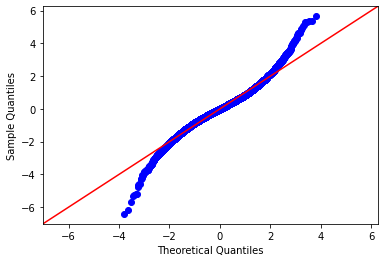

In [2488]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

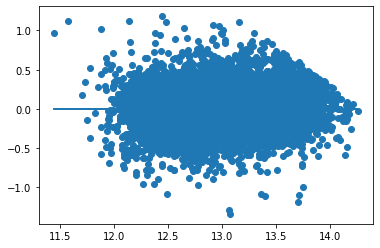

In [2489]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [2490]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.19991181, 0.22636323, 0.21524286, 0.20497223, 0.2110481 ,
       0.22203631, 0.21160254, 0.19563325, 0.20994121, 0.20447129])

0.21012228182217213

0.008986971772063089

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

# Model 2: rank zip

In [2491]:
model_3_df = df[['price',
 'bedrooms',
 'sqft_living',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'renovated_1',
 'rank_10',
 'rank_2',
 'rank_3',
 'rank_4',
 'rank_5',
 'rank_6',
 'rank_7',
 'rank_8',
 'rank_9']]

In [2492]:
model_3_df.head()

,price,bedrooms,sqft_living,floors,waterfront_1,view_1,condition_2,condition_3,condition_4,condition_5,...,renovated_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
0,12.309982,-0.368931,-1.108873,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12.232836,-1.541606,-1.867348,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,13.005830,-0.368931,0.381517,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,12.371587,-0.368931,-0.858460,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12.043554,-1.541606,-1.926790,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2493]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [2494]:
print(len(train), len(test))
train.head()

14618 4873


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
4098,13.017003,-1.541606,-1.057352,-0.959868,-1.219913,1.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5957,12.506177,1.976418,0.529531,0.963393,0.231108,1.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12355,13.361380,-0.368931,0.529531,1.589044,-0.778933,2.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
12686,14.038654,-0.368931,2.116414,1.887572,0.235879,2.5,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
12265,13.208541,-0.368931,0.529531,0.176611,0.424480,1.0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [2495]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
16726,13.764217,0.803743,0.529531,1.596751,0.649410,2.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5071,12.873902,0.803743,-1.057352,0.478185,0.077731,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7448,13.361380,-0.368931,0.529531,-0.437259,-1.179436,1.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
19416,12.235631,-0.368931,-1.057352,-1.410673,-0.418711,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7282,13.041153,-0.368931,0.529531,-0.289471,-2.654719,2.5,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [2496]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2583.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:45   Log-Likelihood:                 2434.9
No. Observations:               14618   AIC:                            -4820.
Df Residuals:                   14593   BIC:                            -4630.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.4615      0.047    288.502      0.000      13.370      13.553
bedrooms        -0.0099      0.002     -4.400      0.000      -0.014      -0.006
sqft_living      0.1834      0.003     63.527      0.000       0.178       0.189
floors          -0.0098      0.004     -2.629      0.009      -0.017      -0.002
waterfront_1     0.3378      0.016     21.693      0.000       0.307       0.368
view_1           0.3378      0.016     21.693      0.000       0.307       0.368
condition_2      0.1505      0.049      3.074      0.002       0.055       0.246
condition_3      0.2646      0.045      5.876      0.000       0.176       0.353
condition_4      0.3088      0.045      6.851      0.000       0.220       0.397
condition_5      0.3884      0.045      8.564      0.000       0.299       0.477
grade_11         0.0830      0.028      2.974      0.003       0.028       0.138
grade_5         -0.4381      0.020    -22.067      0.000      -0.477      -0.399
grade_6         -0.3581      0.012    -28.726      0.000      -0.383      -0.334
grade_7         -0.2981      0.010    -28.743      0.000      -0.318      -0.278
grade_8         -0.2106      0.010    -21.651      0.000      -0.230      -0.192
grade_9         -0.0764      0.010     -7.507      0.000      -0.096      -0.056
renovated_1      0.1251      0.009     13.284      0.000       0.107       0.144
rank_10         -0.9527      0.010    -98.735      0.000      -0.972      -0.934
rank_2          -0.2186      0.009    -23.849      0.000      -0.237      -0.201
rank_3          -0.2774      0.009    -32.030      0.000      -0.294      -0.260
rank_4          -0.2578      0.009    -28.902      0.000      -0.275      -0.240
rank_5          -0.4402      0.009    -48.245      0.000      -0.458      -0.422
rank_6          -0.5609      0.009    -61.241      0.000      -0.579      -0.543
rank_7          -0.5659      0.009    -60.264      0.000      -0.584      -0.548
rank_8          -0.7983      0.009    -88.093      0.000      -0.816      -0.781
rank_9          -0.9260      0.009   -100.463      0.000      -0.944      -0.908
==============================================================================
Omnibus:                      626.930   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2004.768
Skew:                           0.099   Prob(JB):                         0.00
Kurtosis:                       4.803   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Remove Uninfluential features part 2

In [2497]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

26 25
['bedrooms', 'sqft_living', 'floors', 'waterfront_1', 'view_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.4615,0.047,288.502,0.000,13.370,13.553
bedrooms,-0.0099,0.002,-4.400,0.000,-0.014,-0.006
sqft_living,0.1834,0.003,63.527,0.000,0.178,0.189
floors,-0.0098,0.004,-2.629,0.009,-0.017,-0.002
waterfront_1,0.3378,0.016,21.693,0.000,0.307,0.368


In [2498]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2583.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:46   Log-Likelihood:                 2434.9
No. Observations:               14618   AIC:                            -4820.
Df Residuals:                   14593   BIC:                            -4630.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.4615      0.047    288.502      0.000      13.370      13.553
bedrooms        -0.0099      0.002     -4.400      0.000      -0.014      -0.006
sqft_living      0.1834      0.003     63.527      0.000       0.178       0.189
floors          -0.0098      0.004     -2.629      0.009      -0.017      -0.002
waterfront_1     0.3378      0.016     21.693      0.000       0.307       0.368
view_1           0.3378      0.016     21.693      0.000       0.307       0.368
condition_2      0.1505      0.049      3.074      0.002       0.055       0.246
condition_3      0.2646      0.045      5.876      0.000       0.176       0.353
condition_4      0.3088      0.045      6.851      0.000       0.220       0.397
condition_5      0.3884      0.045      8.564      0.000       0.299       0.477
grade_11         0.0830      0.028      2.974      0.003       0.028       0.138
grade_5         -0.4381      0.020    -22.067      0.000      -0.477      -0.399
grade_6         -0.3581      0.012    -28.726      0.000      -0.383      -0.334
grade_7         -0.2981      0.010    -28.743      0.000      -0.318      -0.278
grade_8         -0.2106      0.010    -21.651      0.000      -0.230      -0.192
grade_9         -0.0764      0.010     -7.507      0.000      -0.096      -0.056
renovated_1      0.1251      0.009     13.284      0.000       0.107       0.144
rank_10         -0.9527      0.010    -98.735      0.000      -0.972      -0.934
rank_2          -0.2186      0.009    -23.849      0.000      -0.237      -0.201
rank_3          -0.2774      0.009    -32.030      0.000      -0.294      -0.260
rank_4          -0.2578      0.009    -28.902      0.000      -0.275      -0.240
rank_5          -0.4402      0.009    -48.245      0.000      -0.458      -0.422
rank_6          -0.5609      0.009    -61.241      0.000      -0.579      -0.543
rank_7          -0.5659      0.009    -60.264      0.000      -0.584      -0.548
rank_8          -0.7983      0.009    -88.093      0.000      -0.816      -0.781
rank_9          -0.9260      0.009   -100.463      0.000      -0.944      -0.908
==============================================================================
Omnibus:                      626.930   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2004.768
Skew:                           0.099   Prob(JB):                         0.00
Kurtosis:                       4.803   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Evaluate Model using sci-kit learn's cross_val_score

In [2499]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.19333432, 0.21657792, 0.20913075, 0.19582169, 0.20631594,
       0.21579932, 0.20868973, 0.20271234, 0.20163385, 0.20304116])

0.20530570273961155

0.0072310356740116315

# Check the Normality Assumption

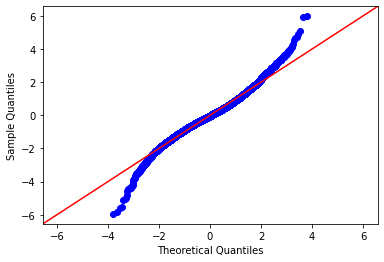

In [2500]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

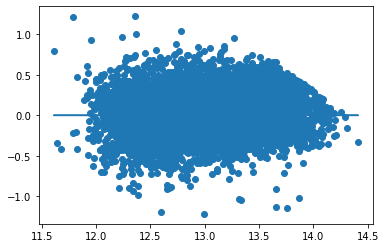

In [2501]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [2502]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('bedrooms', 1.7579707654765258),
 ('sqft_living', 2.899006359977549),
 ('floors', 11.7360271343882),
 ('waterfront_1', inf),
 ('view_1', inf),
 ('condition_2', 1.4053508900754337),
 ('condition_3', 37.37938262875666),
 ('condition_4', 15.191224756198016),
 ('condition_5', 5.319545104208176),
 ('grade_11', 1.1164634672232792),
 ('grade_5', 1.5332752369781872),
 ('grade_6', 5.221187332700378),
 ('grade_7', 15.849436769135865),
 ('grade_8', 9.4032150126821),
 ('grade_9', 4.059258551708846),
 ('renovated_1', 1.0519328014213774),
 ('rank_10', 2.604320887392254),
 ('rank_2', 2.656228037756865),
 ('rank_3', 3.5192626574504806),
 ('rank_4', 3.229834966520511),
 ('rank_5', 2.987806706766635),
 ('rank_6', 2.974036876493697),
 ('rank_7', 2.8896353593826043),
 ('rank_8', 3.1436283405884304),
 ('rank_9', 2.944715908339782)]

## Perform Another Round of Feature Selection

In [2503]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

25 16


In [2504]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     3346.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:47   Log-Likelihood:                 1577.1
No. Observations:               14618   AIC:                            -3120.
Df Residuals:                   14601   BIC:                            -2991.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.5109      0.008   1717.095      0.000      13.496      13.526
bedrooms       -0.0202      0.002     -8.554      0.000      -0.025      -0.016
sqft_living     0.2296      0.003     89.392      0.000       0.225       0.235
condition_2    -0.1451      0.021     -6.910      0.000      -0.186      -0.104
grade_11        0.2315      0.028      8.148      0.000       0.176       0.287
grade_5        -0.0889      0.017     -5.201      0.000      -0.122      -0.055
grade_9         0.1168      0.006     18.852      0.000       0.105       0.129
renovated_1     0.1187      0.010     11.974      0.000       0.099       0.138
rank_10        -0.9990      0.010    -99.018      0.000      -1.019      -0.979
rank_2         -0.2185      0.010    -22.531      0.000      -0.238      -0.199
rank_3         -0.3024      0.009    -33.217      0.000      -0.320      -0.285
rank_4         -0.2797      0.009    -29.757      0.000      -0.298      -0.261
rank_5         -0.4811      0.010    -50.356      0.000      -0.500      -0.462
rank_6         -0.5931      0.010    -61.793      0.000      -0.612      -0.574
rank_7         -0.6122      0.010    -62.357      0.000      -0.631      -0.593
rank_8         -0.8439      0.009    -89.211      0.000      -0.862      -0.825
rank_9         -0.9649      0.010    -99.762      0.000      -0.984      -0.946
==============================================================================
Omnibus:                      813.199   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2604.446
Skew:                           0.233   Prob(JB):                         0.00
Kurtosis:                       5.015   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2505]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.20646965, 0.230894  , 0.22189511, 0.21189421, 0.21494081,
       0.22789497, 0.21933426, 0.20943922, 0.21748173, 0.2136845 ])

0.21739284570303904

0.007410794219323829

In [2506]:
# Save model
#tuple_objects = (linreg, X_train, y_train)
#pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [2507]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,basement_1,rank_10,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9
16726,13.764217,0.803743,0.529531,1.596751,0.649410,2.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5071,12.873902,0.803743,-1.057352,0.478185,0.077731,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7448,13.361380,-0.368931,0.529531,-0.437259,-1.179436,1.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
19416,12.235631,-0.368931,-1.057352,-1.410673,-0.418711,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7282,13.041153,-0.368931,0.529531,-0.289471,-2.654719,2.5,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [2508]:
len(test)

4873

In [2509]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1117.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:46:47   Log-Likelihood:                 540.94
No. Observations:                4873   AIC:                            -1048.
Df Residuals:                    4856   BIC:                            -937.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.5150      0.014    993.650      0.000      13.488      13.542
bedrooms       -0.0288      0.004     -7.176      0.000      -0.037      -0.021
sqft_living     0.2295      0.004     51.368      0.000       0.221       0.238
condition_2    -0.1933      0.035     -5.572      0.000      -0.261      -0.125
grade_11        0.2928      0.044      6.624      0.000       0.206       0.379
grade_5        -0.1567      0.031     -5.014      0.000      -0.218      -0.095
grade_9         0.1449      0.010     13.859      0.000       0.124       0.165
renovated_1     0.1166      0.020      5.872      0.000       0.078       0.156
rank_10        -1.0047      0.017    -57.546      0.000      -1.039      -0.970
rank_2         -0.2273      0.017    -13.434      0.000      -0.260      -0.194
rank_3         -0.3217      0.016    -20.203      0.000      -0.353      -0.291
rank_4         -0.2807      0.016    -17.394      0.000      -0.312      -0.249
rank_5         -0.4824      0.016    -29.406      0.000      -0.515      -0.450
rank_6         -0.6117      0.017    -37.039      0.000      -0.644      -0.579
rank_7         -0.6197      0.017    -37.124      0.000      -0.652      -0.587
rank_8         -0.8445      0.016    -51.259      0.000      -0.877      -0.812
rank_9         -0.9678      0.016    -58.909      0.000      -1.000      -0.936
==============================================================================
Omnibus:                      239.648   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              756.149
Skew:                           0.173   Prob(JB):                    6.37e-165
Kurtosis:                       4.898   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2510]:
len(x_cols)

16

In [2511]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.22246662, 0.21266324, 0.20149242, 0.22012142, 0.21644318,
       0.21167565, 0.22435766, 0.2200313 , 0.21770595, 0.22995797])

0.21769154024838042

0.0074466584022593475